We will be creating a basic binary Logistic Regression Algorithm from beginning using simulated data to find the weights that maximize the likelihood of producing our given data.Our Algorithm might not be fats and efficient like sk-learn but it's just a shot at learning and improving our coding and understanding profficeincy of this algorithm

In [20]:
#importing packages 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#We will be using simulated data for this tutorial
np.random.seed(12)
num_observations = 5000
x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

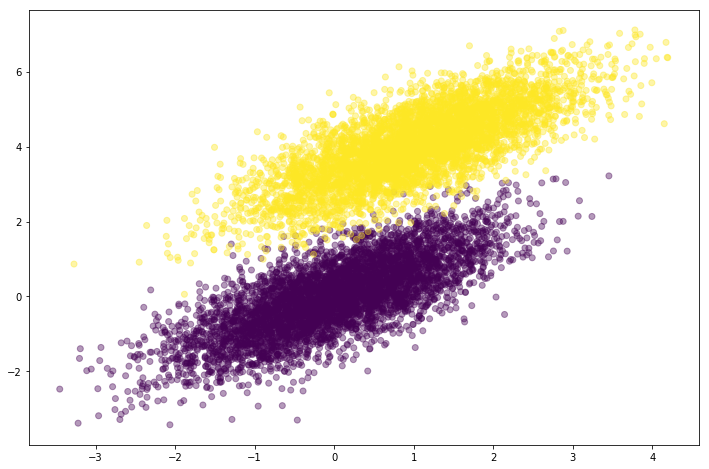

In [7]:
#pictorial representatation of our data
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)


In [8]:
#Now we have pick a link function which in this case is called a sigmoid fuction
def sigmoid(scores):
    return 1/(1 + np.exp(-scores))

In [9]:
'''
we have to find the maximum likelihood 
and calculate the log likelyhood which i'll explain in a blog post
'''
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll


In [15]:
#writing the logistic regression fuction 
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
        
    return weights

In [16]:
#time to test our regression algorithm
weights = logistic_regression(simulated_separableish_features, simulated_labels,num_steps = 300000, learning_rate = 5e-5, add_intercept=True)
print(weights)

-4346.264779152365
-148.7067227680535
-142.9649362310784
-141.5453030715737
-141.060319659308
-140.87031585891611
-140.7902591275381
-140.75505002269912
-140.73914503180956
-140.7318349891588
-140.72843666694826
-140.7268447125533
-140.7260950895047
-140.725740860523
-140.72557306887177
-140.72549345786172
-140.72545564250743
-140.7254376661433
-140.7254291160916
-140.7254250479478
-140.72542311181695
-140.72542219020232
-140.7254217514527
-140.72542154256132
-140.72542144310114
-140.72542139574284
-140.72542137319252
-140.7254213624546
-140.7254213573414
-140.72542135490647
[-14.09225541  -5.05899648   8.28955762]


In [19]:
#Print the accuracy of out Algo
#it's fairly good and we can compare with other models
final_scores = np.dot(np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features)), weights)
preds = np.round(sigmoid(final_scores))

print ('Accuracy of my Algo: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))

Accuracy from scratch: 0.9948


Hope you get the concept, i'll draft a detailed blog post explaining everything. Thanks to all the blogs, videos, tutorials that helped me understand the concept and implement the code 😄😄😄